In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data_utils
import time
import sklearn
from sklearn.metrics import confusion_matrix
from tqdm import tqdm, trange
import pandas as pd
from sklearn.metrics import classification_report
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
# read the file
df = pd.read_csv('spambase.data', header=None)

In [3]:
print(df.shape)
df

(4601, 58)


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
# convert to tensor and store to the loader
# refer link: https://newbedev.com/convert-pandas-dataframe-to-pytorch-tensor
# set the data type and random
data = pd.DataFrame(df,dtype=np.float32)
data = sklearn.utils.shuffle(data)
# Nomalize the features
data = data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
data_train = data.iloc[:3000,:]
data_vali = data.iloc[3000:3900,:]
data_test = data.iloc[3900:,:]
print("data_train:",data_train.shape,"data_vali:",data_vali.shape,"data_test:",data_test.shape)

data_train: (3000, 58) data_vali: (900, 58) data_test: (701, 58)


In [5]:
# train loader
batch_size = 10
train_target = torch.tensor(data_train[57].values.astype(int))
train_target = train_target.type(torch.LongTensor)
train = torch.tensor(data_train.drop(57, axis = 1).values.astype(np.float32)) 
train_tensor = data_utils.TensorDataset(train, train_target) 
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = False)
# validation loader
vali_target = torch.tensor(data_vali[57].values.astype(int))
vali_target = vali_target.type(torch.LongTensor)
vali = torch.tensor(data_vali.drop(57, axis = 1).values.astype(np.float32)) 
vali_tensor = data_utils.TensorDataset(vali, vali_target) 
vali_loader = data_utils.DataLoader(dataset = vali_tensor, batch_size = batch_size, shuffle = False)
# test loader
test_target = torch.tensor(data_test[57].values.astype(int))
test_target = test_target.type(torch.LongTensor)
test = torch.tensor(data_test.drop(57, axis = 1).values.astype(np.float32)) 
test_tensor = data_utils.TensorDataset(test, test_target) 
test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = batch_size, shuffle = False)

# class labels
classes = ("normal","spam")

### Conclution with function 

In [6]:
def load_spam_data(file_path,batch_size):
    df = pd.read_csv(file_path, header=None)
    # convert to tensor and store to the loader
    # refer link: https://newbedev.com/convert-pandas-dataframe-to-pytorch-tensor
    # set the data type and random
    data = pd.DataFrame(df,dtype=np.float32)
    data = sklearn.utils.shuffle(data)
    # Nomalize the features
    data = data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    data_train = data.iloc[:3000,:]
    data_vali = data.iloc[3000:3900,:]
    data_test = data.iloc[3900:,:]
    print("data_train:",data_train.shape,"data_vali:",data_vali.shape,"data_test:",data_test.shape)
    # train loader
    train_target = torch.tensor(data_train[57].values.astype(int))
    train_target = train_target.type(torch.LongTensor)
    train = torch.tensor(data_train.drop(57, axis = 1).values.astype(np.float32)) 
    train_tensor = data_utils.TensorDataset(train, train_target) 
    train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = False)
    # validation loader
    vali_target = torch.tensor(data_vali[57].values.astype(int))
    vali_target = vali_target.type(torch.LongTensor)
    vali = torch.tensor(data_vali.drop(57, axis = 1).values.astype(np.float32)) 
    vali_tensor = data_utils.TensorDataset(vali, vali_target) 
    vali_loader = data_utils.DataLoader(dataset = vali_tensor, batch_size = batch_size, shuffle = False)
    # test loader
    test_target = torch.tensor(data_test[57].values.astype(int))
    test_target = test_target.type(torch.LongTensor)
    test = torch.tensor(data_test.drop(57, axis = 1).values.astype(np.float32)) 
    test_tensor = data_utils.TensorDataset(test, test_target) 
    test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = batch_size, shuffle = False)

    # class labels
    classes = ("normal","spam")
    return train_loader,vali_loader,test_loader,classes

In [7]:
file_path = 'spambase.data'
batch_size = 10
trainloader,validationloader,testloader,classes = load_spam_data(file_path,batch_size)

data_train: (3000, 58) data_vali: (900, 58) data_test: (701, 58)


In [8]:
# test the data
# for example, one batch_size
for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    break

In [9]:
# for example, one batch_size
print("train_batch_shape:",inputs.shape)
print(labels)
print("the labels of one batch:",[classes[i] for i in labels.numpy().astype(int).tolist()])
print("the matrix of images in one batch:\n",inputs)

train_batch_shape: torch.Size([10, 57])
tensor([1, 0, 1, 0, 1, 0, 1, 1, 0, 1])
the labels of one batch: ['spam', 'normal', 'spam', 'normal', 'spam', 'normal', 'spam', 'spam', 'normal', 'spam']
the matrix of images in one batch:
 tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.8000e-02, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 9.9560e-02, 0.0000e+00, 7.0321e-02,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e-02, 0.0000e+00, 0.0000e+00,
         1.8133e-01, 0.0000e+00, 1.6292e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.1513e-02,
         0.0000e+00, 0.0000e+00, 1.0271e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         3.6260e-02, 5.7219e-02, 3.8961e-02, 6.1272e-03, 0.0000e+00, 0.0000e+00,
         4.6219e-03, 8.2099e-03, 3.3396e-0

### Fully Connected Network Model Set

In [10]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(57, 114),
            nn.ReLU(),
            nn.Linear(114, 114),
            nn.ReLU(),
            nn.Linear(114, 2)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

net = NeuralNetwork()

In [11]:
# show the information of the NN
print("Model Information:",net)

Model Information: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=57, out_features=114, bias=True)
    (1): ReLU()
    (2): Linear(in_features=114, out_features=114, bias=True)
    (3): ReLU()
    (4): Linear(in_features=114, out_features=2, bias=True)
  )
)


In [12]:
# visualize the layer,download the pdf
import torch
from torchviz import make_dot
x = torch.rand(10,57)
g = make_dot(net(x))
g.render('Q2_NN_Model', view=True)

'Q2_NN_Model.pdf'

In [13]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
# create the required list
loss_list = []
acc_list = []
loss_list_val = []
acc_list_val = []
interation_times = 0

In [15]:
# compute acc
def compute_acc(outputs, labels):
    max_list = []
    tmp_list = []
    _, predicted = torch.max(outputs, 1)
    max_list = predicted.tolist()
    for i in range(len(max_list)):
        if max_list[i] == labels[i]:
            tmp_list.append(1)
        else:
            tmp_list.append(0)
    return sum(tmp_list)/len(tmp_list)

In [16]:
epoch_num = 100
for epoch in tqdm(range(1,epoch_num+1)): 
    running_loss = 0.0
    running_acc = 0.0
    times = 0
    for i, data in enumerate(trainloader, 0):
        times += 1
        # get the training data
        inputs, labels = data
        # initilize the parameter
        optimizer.zero_grad()

        # forward,backward and optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # record statistics
        interation_times += 1
        running_loss += loss.item()
        running_acc += compute_acc(outputs, labels)
        
    loss_list.append([running_loss / times,epoch])
    acc_list.append([running_acc / times,epoch])
    running_loss = 0.0
    running_acc = 0.0

    #validation
    loss_val = 0; correct_val = 0; total = 0
    for data in validationloader:
        images, labels = data
        outputs = net(images)
        loss_val += criterion(outputs, labels).item()
        correct_val += compute_acc(outputs, labels)
        total += 1

    loss_list_val.append([loss_val / total,epoch])
    acc_list_val.append([correct_val / total,epoch])
                
print('Finished Training')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:39<00:00,  2.55it/s]


Finished Training


Text(0.5, 1.0, 'cost for NN training')

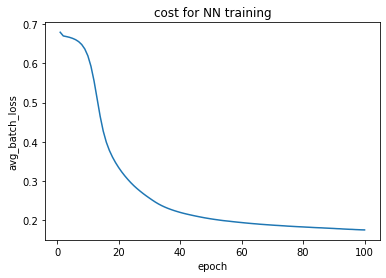

In [17]:
# draw the CNN training cost
iteration_loss_list = loss_list

# draw plot 
plt.plot([x[1] for x in iteration_loss_list], [y[0] for y in iteration_loss_list])

# set the label of X and y
plt.xlabel("epoch")
plt.ylabel("avg_batch_loss")

# set the title of plot 
plt.title("cost for NN training")

Text(0.5, 1.0, 'accuracy for NN training')

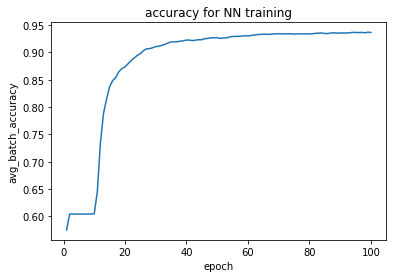

In [18]:
# draw the CNN training acc
iteration_acc_list = acc_list

# draw plot 
plt.plot([x[1] for x in iteration_acc_list], [y[0] for y in iteration_acc_list])

# set the label of X and y
plt.xlabel("epoch")
plt.ylabel("avg_batch_accuracy")

# set the title of plot 
plt.title("accuracy for NN training")

Text(0.5, 1.0, 'cost for NN validation')

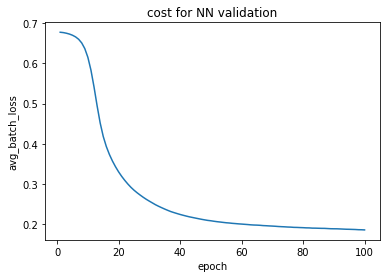

In [19]:
# draw the CNN validation cost
iteration_loss_list = loss_list_val

# draw plot 
plt.plot([x[1] for x in iteration_loss_list], [y[0] for y in iteration_loss_list])

# set the label of X and y
plt.xlabel("epoch")
plt.ylabel("avg_batch_loss")

# set the title of plot 
plt.title("cost for NN validation")

Text(0.5, 1.0, 'accuracy for NN validation')

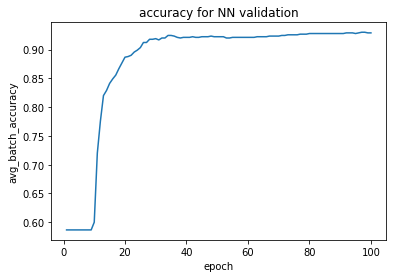

In [20]:
# draw the CNN validation acc
iteration_acc_list = acc_list_val

# draw plot 
plt.plot([x[1] for x in iteration_acc_list], [y[0] for y in iteration_acc_list])

# set the label of X and y
plt.xlabel("epoch")
plt.ylabel("avg_batch_accuracy")

# set the title of plot 
plt.title("accuracy for NN validation")

### Save Model

In [21]:
# save the model
torch.save(net.state_dict(), "Q2_NN.pth")
print("Saved")

Saved


### Load Saved Model

In [22]:
net = NeuralNetwork()
net.load_state_dict(torch.load("Q2_NN.pth"))

<All keys matched successfully>

### Test

In [23]:
# test all the test data
correct = 0
total = 0

for data in testloader:
    images, labels = data
    outputs = net(images)
    correct += compute_acc(outputs, labels)
    total += 1

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 93 %


In [24]:
# test all the test data based on differnt classification
# prepare to count predictions for each class
correct_pred = {_name: 0 for _name in classes}
total_pred = {_name: 0 for _name in classes}
y_true = []
y_pred = []

for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predictions = torch.max(outputs, 1)
    # collect the correct predictions for each class
    y_true += labels.tolist()
    y_pred += predictions.tolist()
    for label, prediction in zip(labels, predictions):
        if label == prediction:
            correct_pred[classes[label]] += 1
        total_pred[classes[label]] += 1

# print accuracy for each classification
for _name, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[_name]
    print("Accuracy for class {:5s} is: {:.1f} %".format(_name,accuracy))

Accuracy for class normal is: 94.4 %
Accuracy for class spam  is: 92.9 %


### Evaluation

In [25]:
# confusion matrix
def evaluation(y_true,y_pred,classes):
    judge = classification_report(y_true, y_pred,target_names=classes)
    print(judge)
    #confusion matrix
    classes = classes
    confusion = confusion_matrix(y_true, y_pred)
    plt.imshow(confusion, cmap=plt.cm.Greens)
    indices = range(len(confusion))
    plt.xticks(indices, classes)
    plt.yticks(indices, classes)
    plt.colorbar()
    plt.xlabel('y_pred')
    plt.ylabel('y_true')
    for first_index in range(len(confusion)):
        for second_index in range(len(confusion[first_index])):
            plt.text(first_index, second_index, confusion[first_index][second_index])
    plt.show()

              precision    recall  f1-score   support

      normal       0.96      0.94      0.95       447
        spam       0.90      0.93      0.92       254

    accuracy                           0.94       701
   macro avg       0.93      0.94      0.93       701
weighted avg       0.94      0.94      0.94       701



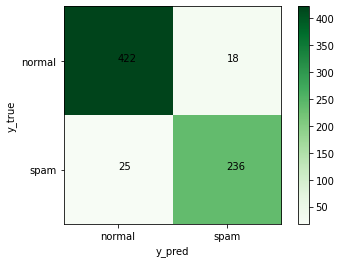

In [26]:
evaluation(y_true,y_pred,classes)